In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import the data

In [3]:
data = pd.read_csv('/Users/chenjiayi/Downloads/data/FinalDataset/Defacement_BestFirst.csv')
data

,domain_token_count,avgpathtokenlen,tld,ArgUrlRatio,NumberofDotsinURL,Arguments_LongestWordLength,spcharUrl,delimeter_Domain,delimeter_path,NumberRate_DirectoryName,SymbolCount_Domain,Entropy_Domain,class
0,2,13.5,2,0.524691,11,79,3,0,10,0.00,1,0.860529,benign
1,2,13.5,2,0.515723,11,76,3,0,10,0.00,1,0.860529,benign
2,2,13.5,2,0.465278,10,61,3,0,9,0.00,1,0.860529,benign
3,2,13.5,2,0.416667,9,49,3,0,8,0.00,1,0.860529,benign
4,2,9.5,2,0.356061,4,41,6,0,3,0.25,1,0.863489,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15706,2,2.8,2,0.054054,2,-1,3,0,2,0.00,1,0.683641,Defacement
15707,2,2.6,2,0.055556,2,-1,3,0,2,0.00,1,0.683641,Defacement
15708,2,34.6,2,0.010204,2,-1,2,0,3,0.00,1,0.683641,Defacement
15709,2,3.25,2,0.057143,2,-1,3,0,1,0.00,1,0.683641,Defacement


In [4]:
df = data['class']
df.value_counts(normalize = True)

Defacement    0.504742
benign        0.495258
Name: class, dtype: float64

In [5]:
df2 = data.replace('benign', '1').replace('Defacement', '0')
df2 = df2.replace('?', '0')

In [61]:
x = df2.drop(['class'], axis = 1)
y = df2['class']
x

,domain_token_count,avgpathtokenlen,tld,ArgUrlRatio,NumberofDotsinURL,Arguments_LongestWordLength,spcharUrl,delimeter_Domain,delimeter_path,NumberRate_DirectoryName,SymbolCount_Domain,Entropy_Domain
0,2,13.5,2,0.524691,11,79,3,0,10,0.00,1,0.860529
1,2,13.5,2,0.515723,11,76,3,0,10,0.00,1,0.860529
2,2,13.5,2,0.465278,10,61,3,0,9,0.00,1,0.860529
3,2,13.5,2,0.416667,9,49,3,0,8,0.00,1,0.860529
4,2,9.5,2,0.356061,4,41,6,0,3,0.25,1,0.863489
...,...,...,...,...,...,...,...,...,...,...,...,...
15706,2,2.8,2,0.054054,2,-1,3,0,2,0.00,1,0.683641
15707,2,2.6,2,0.055556,2,-1,3,0,2,0.00,1,0.683641
15708,2,34.6,2,0.010204,2,-1,2,0,3,0.00,1,0.683641
15709,2,3.25,2,0.057143,2,-1,3,0,1,0.00,1,0.683641


In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = None)
k_range = range(1,10)
k_score = []
for i in k_range:
    clf = RandomForestClassifier(max_depth = i)
    clf.fit(x_train, y_train)
    score = cross_val_score(clf, x, y, cv = 5, scoring = 'accuracy')
    k_score.append(score.mean())
    
k_score



[0.7511453518503629,
 0.7401969518716686,
 0.750317853441706,
 0.7394330666816805,
 0.7454801704372503,
 0.7521638114302484,
 0.7506361220604203,
 0.7545826529324763,
 0.7571924556059326]

In [70]:
import matplotlib.pyplot as plt

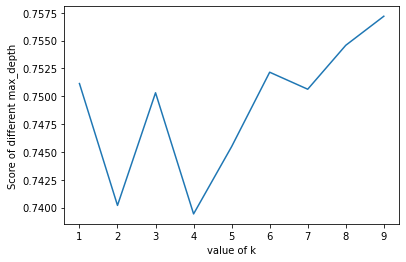

the most suitable depth is: 9


In [71]:
plt.plot(k_range, k_score)
plt.xlabel('value of k')
plt.ylabel('Score of different max_depth')
plt.show()
d1 = dict(zip(k_range, k_score))
depth = max(d1, key = lambda x:d1[x])
print('the most suitable depth is:', depth)

In [72]:
clf = RandomForestClassifier(max_depth = 9)
clf.fit(x_train, y_train)
label = clf.predict(x_test)

In [73]:
accuracy_score(label, y_test)

0.9853643016226535

In [83]:
y_train

9551     1
13655    1
1236     0
2743     0
7102     1
        ..
231      0
7830     0
432      0
8971     0
3273     0
Name: class, Length: 12568, dtype: object

In [92]:
length_one = df2['avgpathtokenlen']
length_two = df2['Arguments_LongestWordLength']
class_clo = df2['class']

In [102]:
df3 = pd.concat([length_one, length_two, class_clo], axis = 1)
df3

,avgpathtokenlen,Arguments_LongestWordLength,class
0,13.5,79,1
1,13.5,76,1
2,13.5,61,1
3,13.5,49,1
4,9.5,41,1
...,...,...,...
15706,2.8,-1,0
15707,2.6,-1,0
15708,34.6,-1,0
15709,3.25,-1,0


In [106]:
length = df3.drop(['class'], axis = 1)
y1 = df3['class']

In [107]:
X1_train, X1_test, y1_train, y1_test = train_test_split(length, y1, train_size = 0.8, random_state = 0)

In [108]:
clf2 = RandomForestClassifier(max_depth = 9)
clf2.fit(X1_train, y1_train)

RandomForestClassifier(max_depth=9)

In [109]:
conquer = clf2.predict(X1_test)


In [110]:
accuracy_score(conquer, y1_test)

0.8905504295259307